<a href="https://colab.research.google.com/github/rrizwan98/Dr.-Dinish-/blob/main/cancer_risk_factor_all_first_1_7_columns_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [4]:
data1=pd.read_csv('/content/sir-dinish-final.csv')
data1.head()

,Patie0t De1ographic age,Gender,Patie0t De1ographic ge0der,Associated 0actor Diarrheoa <6 1o0ths,Associated 0actor Peptic ulcer,1edical histor1 Diabetic,1edical histor1 coeliac,1edical histor1 autoi11u0e,1edical histor1 IBD,1edical histor1 Previous ca0cer,...,1edical histor1 diverticular,1edical histor1 Pa0creatitis,1edical histor1 Bile acid,1edical histor1 Th1roid,0a1il1 histor1 IBD,0a1il1 histor1 IBS,0a1il1 histor1 Colorectal ca0cer,Social histor1 s1oki0g,Social histor1 Alcohol,labels
0,65,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
1,62,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,48,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,78,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,26,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [26]:
# select first six columns
data=data1.iloc[:, [0,1,2,3,4,5,6,7,20]]
data

,Gender,Patie0t De1ographic ge0der,Associated 0actor Diarrheoa <6 1o0ths,Associated 0actor Peptic ulcer,1edical histor1 Diabetic,1edical histor1 coeliac,1edical histor1 autoi11u0e,1edical histor1 IBD,labels
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
1294,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0
1295,0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0
1296,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0
1297,1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0


In [27]:

print("Number of cells with null values: " , data.isnull().sum().sum())

Number of cells with null values:  625


In [28]:
data = data.fillna(0)

In [29]:
print("Number of cells with null values: " , data.isnull().sum().sum())

Number of cells with null values:  0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 1299 non-null   int64  
 1   Patie0t De1ographic ge0der             1299 non-null   float64
 2   Associated 0actor Diarrheoa <6 1o0ths  1299 non-null   float64
 3   Associated 0actor Peptic ulcer         1299 non-null   float64
 4   1edical histor1 Diabetic               1299 non-null   float64
 5   1edical histor1 coeliac                1299 non-null   float64
 6   1edical histor1 autoi11u0e             1299 non-null   float64
 7   1edical histor1 IBD                    1299 non-null   float64
 8   labels                                 1299 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 91.5 KB


In [31]:
data.describe()

,Gender,Patie0t De1ographic ge0der,Associated 0actor Diarrheoa <6 1o0ths,Associated 0actor Peptic ulcer,1edical histor1 Diabetic,1edical histor1 coeliac,1edical histor1 autoi11u0e,1edical histor1 IBD,labels
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,0.431871,0.285604,0.144727,0.195535,0.304850,0.213241,0.130870,0.252502,0.615858
std,0.495527,0.451876,0.351961,0.396765,0.460521,0.409754,0.337388,0.434615,0.486579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# def plot_hist(variable):
#     plt.figure(figsize = (10,5))
#     plt.hist(data[variable], bins = 80)
#     plt.xlabels(variable)
#     plt.ylabels("Frequency")
#     plt.title("{} distribution with hist".format(variable))
#     plt.show()

# numericVar = ["Patie0t De1ographic age"]
# for n in numericVar:
#     plot_hist(n)

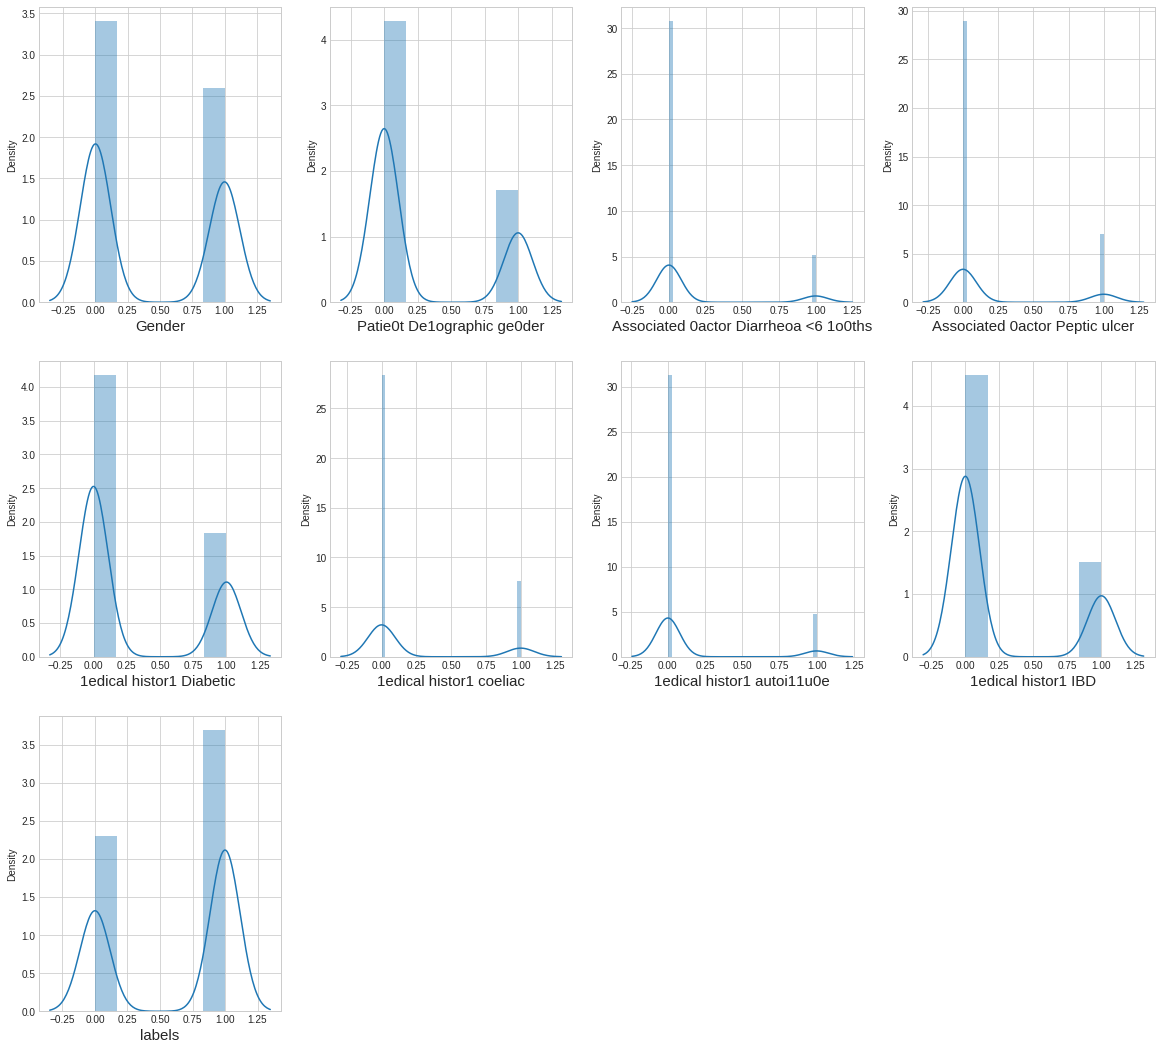

In [33]:
# def bar_plot(variable):

#     var = data[variable]
#     varValue = var.value_counts()
    
#     # görselleştirme
#     plt.figure(figsize = (9,3))
#     plt.bar(varValue.index, varValue)
#     plt.xticks(varValue.index, varValue.index.values)
#     plt.ylabels("Frequency")
#     plt.title(variable)
#     plt.show()
#     print("{}: \n {}".format(variable,varValue))

plt.figure(figsize = (20, 25))
plotnumber = 1
for column in data:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()
# # Patie0t De1ographic age	Patie0t De1ographic ge0der	Associated 0actor Diarrheoa <6 1o0ths	Associated 0actor che1otherap1	Associated 0actor 1ethotrexate	Associated 0actor PPI	Associated 0actor SSRI	Associated 0actor Beta Blocker	Associated 0actor 0SAID's	Associated 0actor Laxative	Associated 0actor steroid	Associated 0actor Bowel op	Associated 0actor Peptic ulcer	1edical histor1 Diabetic	1edical histor1 coeliac	1edical histor1 autoi11u0e	1edical histor1 IBD	1edical histor1 Previous ca0cer	1edical histor1 clostridiu1	1edical histor1 diverticular	1edical histor1 Pa0creatitis	1edical histor1 Bile acid	1edical histor1 Th1roid	0a1il1 histor1 IBD	0a1il1 histor1 IBS	0a1il1 histor1 Colorectal ca0cer	Social histor1 s1oki0g	Social histor1 Alcohol	    

In [34]:
# sns.pairplot(data,hue='labels')
# plt.legend()
# plt.show()

In [35]:
data["labels"].value_counts()

1    800
0    499
Name: labels, dtype: int64

In [36]:
# data shuffling frac=1 mean 100% shuffle 
data = data.sample(frac = 1)
data.head()

,Gender,Patie0t De1ographic ge0der,Associated 0actor Diarrheoa <6 1o0ths,Associated 0actor Peptic ulcer,1edical histor1 Diabetic,1edical histor1 coeliac,1edical histor1 autoi11u0e,1edical histor1 IBD,labels
698,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1059,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1171,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0
1223,0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0
666,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [37]:

print("Number of cells with null values: " , data.duplicated().sum())

Number of cells with null values:  1144


In [38]:
data[["Patie0t De1ographic ge0der","labels"]].groupby(["Patie0t De1ographic ge0der"], as_index = False).mean()

,Patie0t De1ographic ge0der,labels
0,0.0,0.542026
1,1.0,0.800539


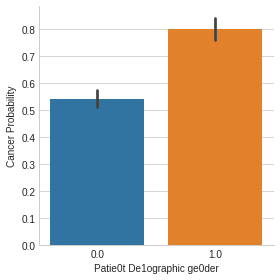

In [39]:
g = sns.factorplot(x = "Patie0t De1ographic ge0der", y = "labels", data = data, kind = "bar", size = 4)
g.set_ylabels("Cancer Probability")
plt.show()

In [40]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
# Models:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evolution:
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
#from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
X = data.drop(["labels"], axis=1)
y = data["labels"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42 ) #test-train data split - 20/80
#X_train[0:10]  #eğitim setinin ilk 10 satırı
print("X_train : ",len(X_train))
print("X_test : ",len(X_test))
print("y_train : ",len(y_train))
print("y_test : ",len(y_test))

X_train :  1039
X_test :  260
y_train :  1039
y_test :  260


In [42]:
print(X_train.shape)
print(X_test.shape)
print(X_train.values)

(1039, 8)
(260, 8)
[[0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [43]:
from warnings import filterwarnings
filterwarnings('ignore')

In [44]:
models = [("LR", LogisticRegression(max_iter=1000)),
          ("SVC", SVC()),
          ("KNC", KNeighborsClassifier(n_neighbors=10)),
          ("DTC", DecisionTreeClassifier()),
          ("GNB", GaussianNB()),
         ("SGDC", SGDClassifier()),
         ("Perc", Perceptron()),
          ("NC", NearestCentroid()),
          ("Ridge", RidgeClassifier()),
          ("BNB", BernoulliNB()),
          ("RF", RandomForestClassifier()),
          ("ADA", AdaBoostClassifier()),
          ("XGB", GradientBoostingClassifier()),
          ("PAC", PassiveAggressiveClassifier()) 
    
]

results = []
names=[]
finalresults=[]

for name, model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score= precision_score(y_test, model_results, average='macro')
    results.append(score)
    names.append(name)
    finalresults.append((name,score))
finalresults.sort(key=lambda k:k[1], reverse=True)
finalresults

[('RF', 0.9535080304311073),
 ('DTC', 0.9506535947712418),
 ('XGB', 0.9479813664596273),
 ('KNC', 0.945054945054945),
 ('SVC', 0.9425664799433391),
 ('LR', 0.942156862745098),
 ('Ridge', 0.939521518310612),
 ('Perc', 0.9307444641566462),
 ('BNB', 0.9307444641566462),
 ('PAC', 0.9307444641566462),
 ('ADA', 0.9269563008130082),
 ('GNB', 0.9219530706470178),
 ('SGDC', 0.9109533594868922),
 ('NC', 0.9021849593495935)]

In [45]:
# Grid search and space:
models_params= {
    "RF":{'model':RandomForestClassifier(),
         'params':{
             'max_features': list(range(1,10)),
             'n_estimators':[10,100,1000]
         }}}

# Evaluation:

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=20)

# Search:
scores=[]

for model_name, params in models_params.items(): 
    rs = RandomizedSearchCV(params['model'], params['params'], cv=cv , n_iter=10)
    rs.fit(X_train,y_train)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
data

,Model,Parameters,Score
0,RF,"{'n_estimators': 100, 'max_features': 4}",0.927573


In [46]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42,max_features= 4)

In [47]:
# Train the model on training data
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=1000, random_state=42)

In [48]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


In [49]:
expected=y_test
print(predictions)
print(expected)

[1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0
 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1
 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0
 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 0]
655     1
922     0
1249    0
644     1
551     1
       ..
757     1
1179    0
583     1
341     1
1193    0
Name: labels, Length: 260, dtype: int64


In [50]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1 = df.head(5)
df1

,Actual,Predicted
655,1,1
922,0,0
1249,0,0
644,1,1
551,1,1


In [ ]:
# g = sns.factorplot(x = "Actual", y = "Predicted", data = df1, kind = "bar", size = 4)
# g.set_ylabels("Cancer Probability")
# plt.show()